 DIABETIES DETECTION AND PREDICTION USING MACHINE LEARNING & AI

Machine learning and AI as become center point in solving health related problems like diabetes detection and prediction. The disease has affected many people across the global. This is resulted by increase in blood sugar level due to insulin imbalanced processed by the body. Every time the problem occurs doctors are consulted which is time wastage.The Main purpose of the task is to come up with solution for early detection by use of different classification algorithm and adopt the suitable in terms of its accuracy. The project will utilize supervised algorithm include;

•	Logistic regression
•	Random forest classifier
•	Decision tree classifier

Before starting of modeling, the procedure will be guided by the steps below;

•	Data understanding
•	Data preparation
•	Data modeling
•	Model evaluation
•	Deployment for production









Importing required dependencies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data collection

In [2]:
#Reading data to dataframe with pandas by copying the path of data and pasting it
diabetics_data=pd.read_csv("D:\\download\\health care diabetes.csv")

Data understanding and preparation

In [3]:
#Print the first 5 rows of dataframe
diabetics_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Print the last 5 rows of dataframe
diabetics_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Printing the rows and columns
diabetics_data.shape

(768, 9)

In [6]:
#Displaying the data information
diabetics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Getting to know variables name
diabetics_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Checking for data types
diabetics_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
#Printing for missing values
diabetics_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Duplicated values
diabetics_data.duplicated().sum()

0

In [11]:
# Understanding statistical measures
diabetics_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# Computing correlation to get more understanding on variables relationship
diabetics_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


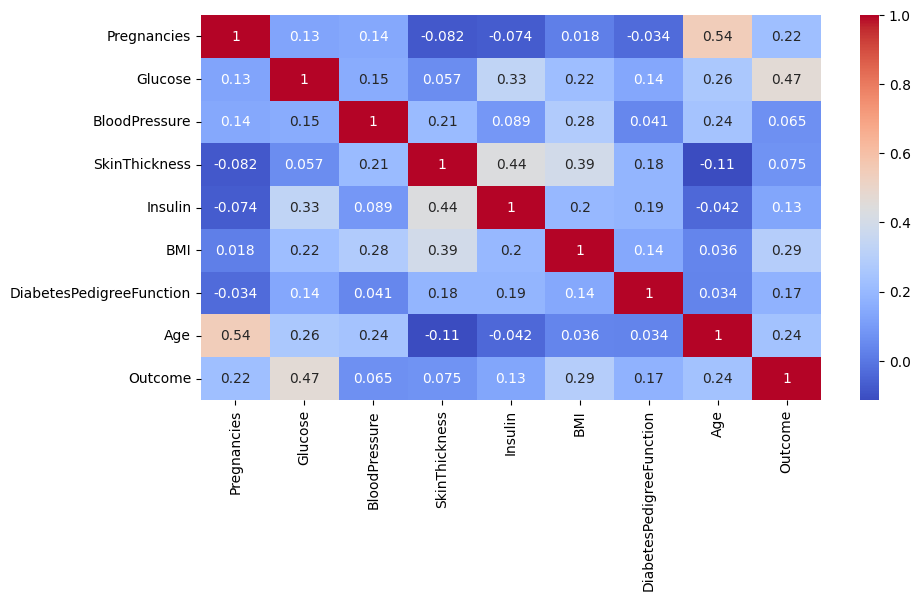

In [13]:
#Plotting heatmap to visualize the correlation
plt.figure(figsize=(10,5))
sns.heatmap(diabetics_data.corr(),cmap='coolwarm',annot=True)
plt.show()

Plotting a histogram to visualize the distribution

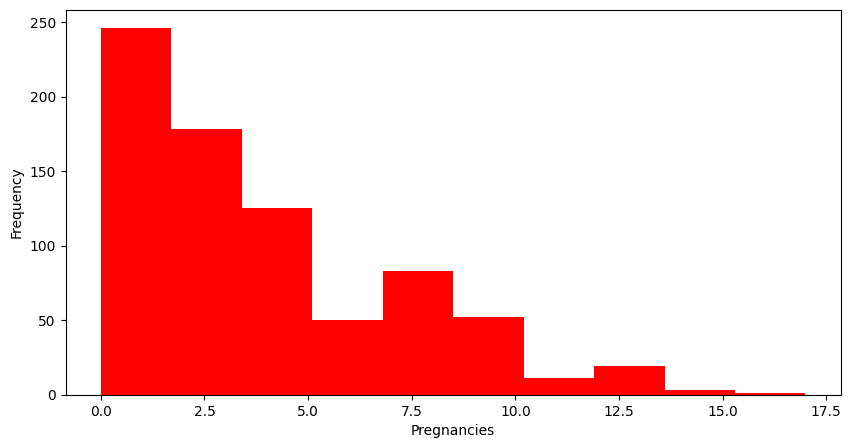

In [14]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.Pregnancies,color='red')
plt.xlabel('Pregnancies')
plt.ylabel("Frequency")
plt.show()

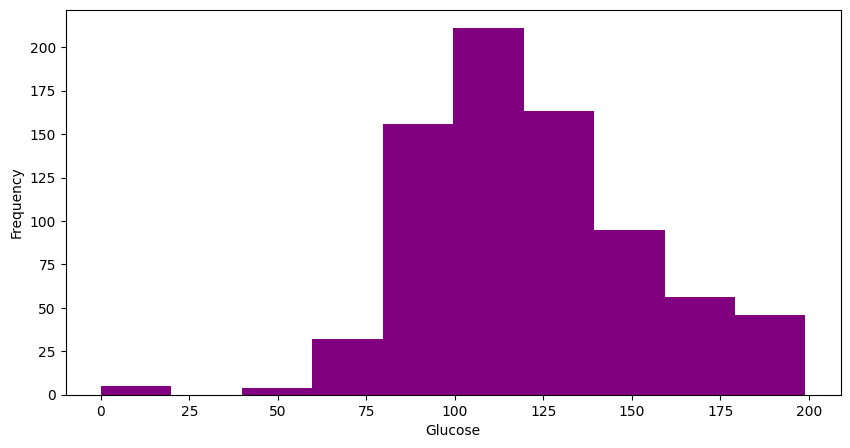

In [15]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.Glucose,color='purple')
plt.xlabel('Glucose')
plt.ylabel("Frequency")
plt.show()

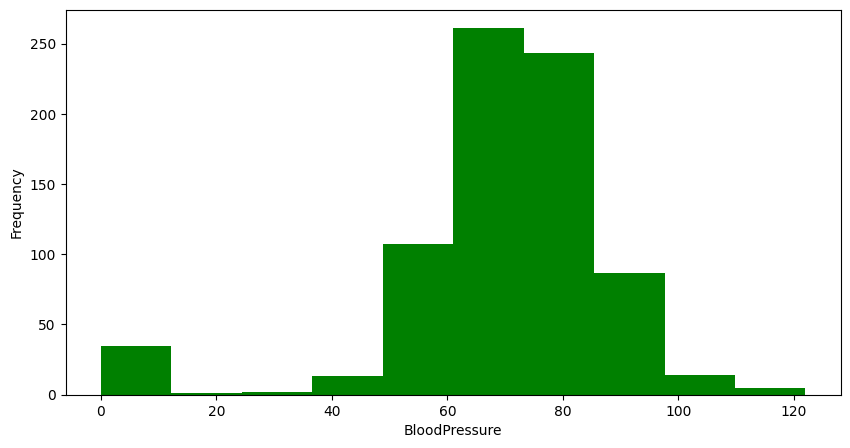

In [16]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.BloodPressure,color='green')
plt.xlabel('BloodPressure')
plt.ylabel("Frequency")
plt.show()

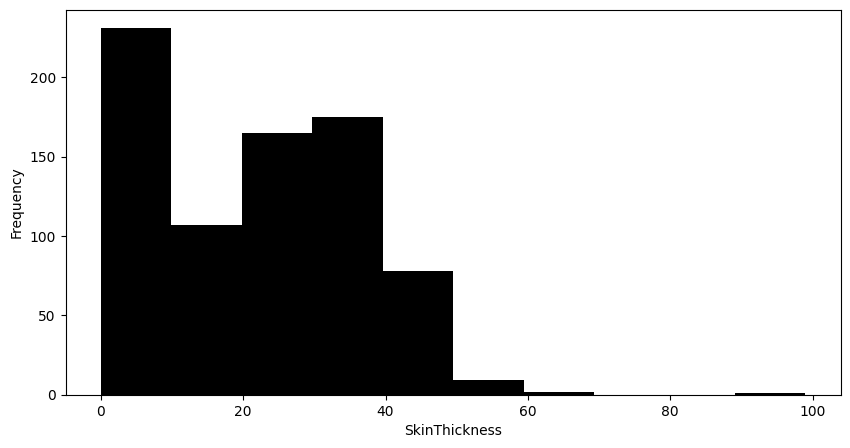

In [17]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.SkinThickness,color='black')
plt.xlabel('SkinThickness')
plt.ylabel("Frequency")
plt.show()

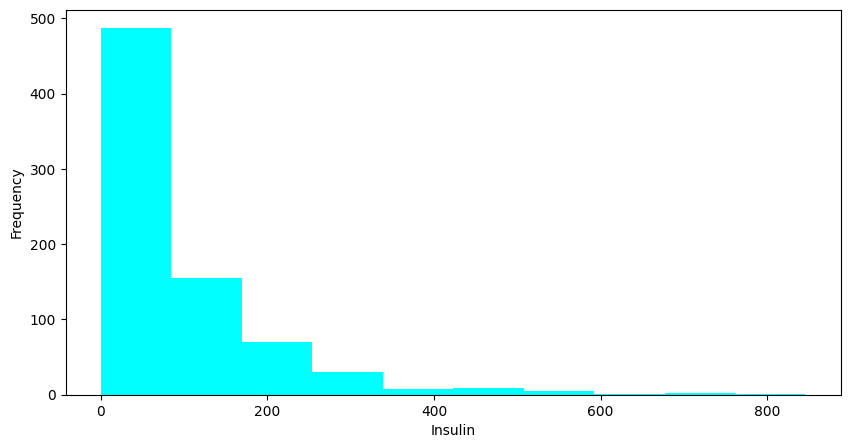

In [18]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.Insulin,color='cyan')
plt.xlabel('Insulin')
plt.ylabel("Frequency")
plt.show()

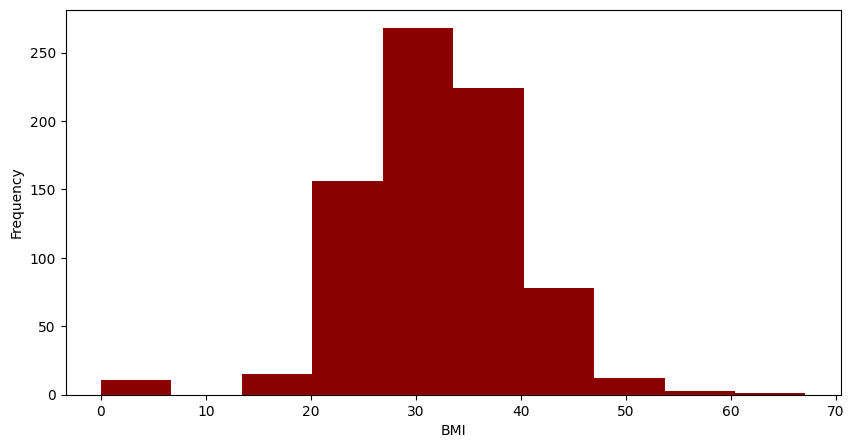

In [19]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.BMI,color='darkred')
plt.xlabel('BMI')
plt.ylabel("Frequency")
plt.show()

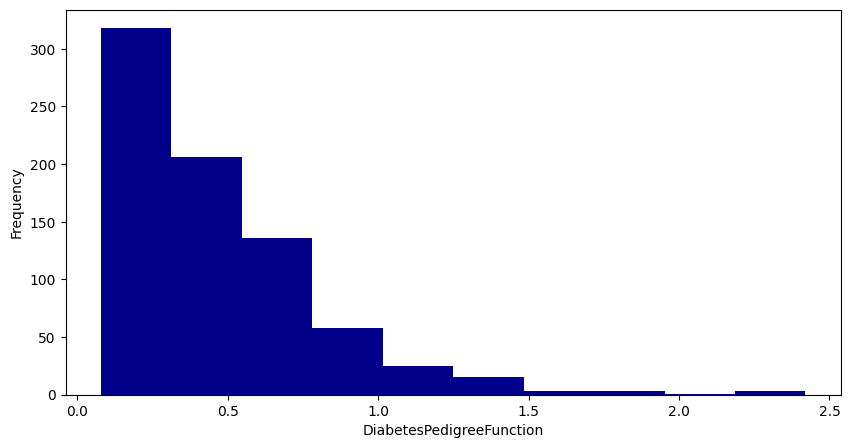

In [20]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.DiabetesPedigreeFunction,color='darkblue')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel("Frequency")
plt.show()

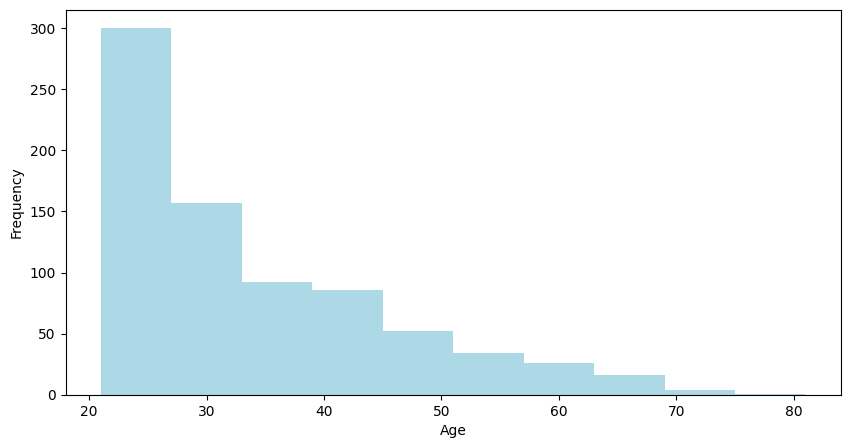

In [21]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.Age,color='lightblue')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

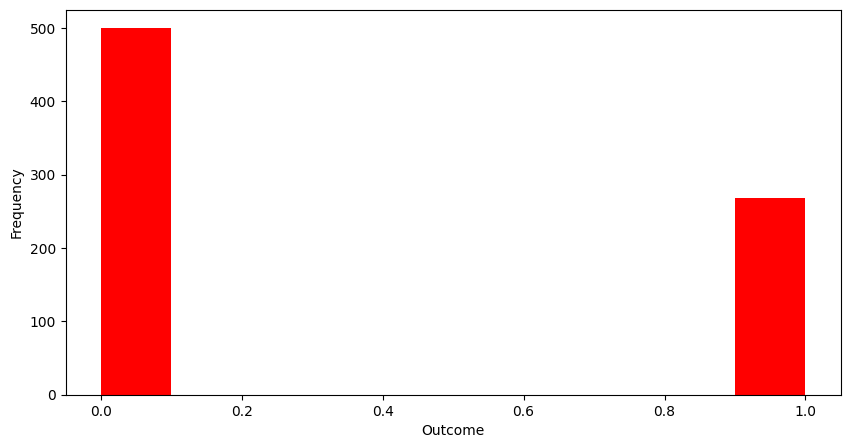

In [22]:
#Checking the data distribution with histogram graph
plt.figure(figsize=(10,5))
plt.hist(diabetics_data.Outcome,color='red')
plt.xlabel('Outcome')
plt.ylabel("Frequency")
plt.show()

Detecting outlier with boxplot

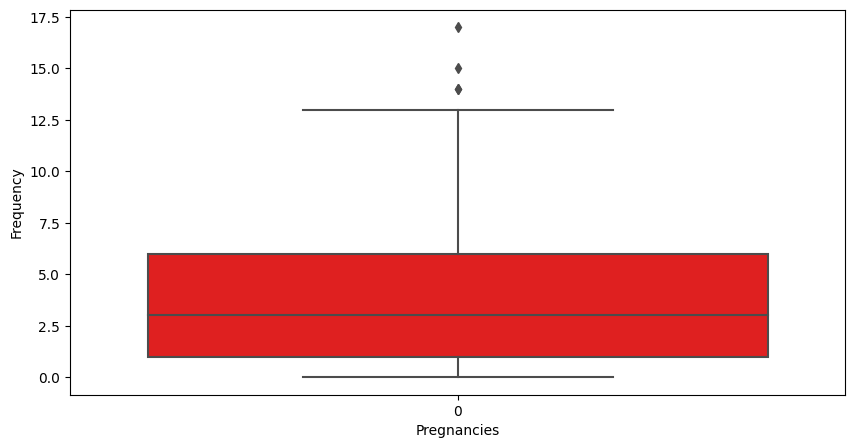

In [23]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.Pregnancies,color='red')
plt.xlabel('Pregnancies')
plt.ylabel("Frequency")
plt.show()

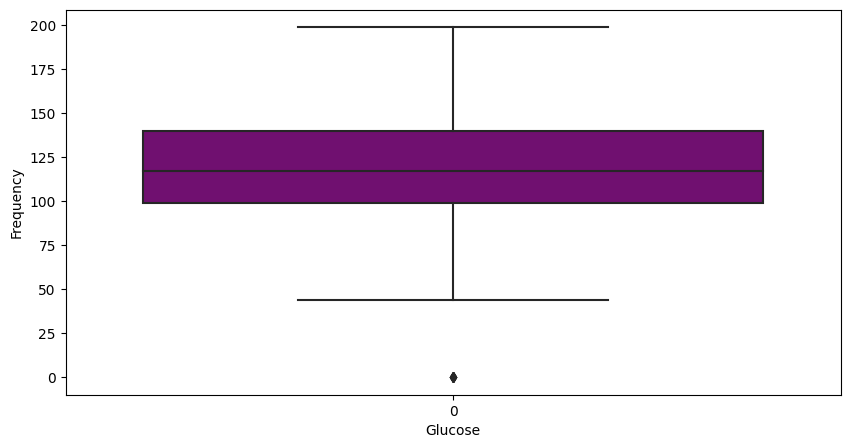

In [24]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.Glucose,color='purple')
plt.xlabel('Glucose')
plt.ylabel("Frequency")
plt.show()

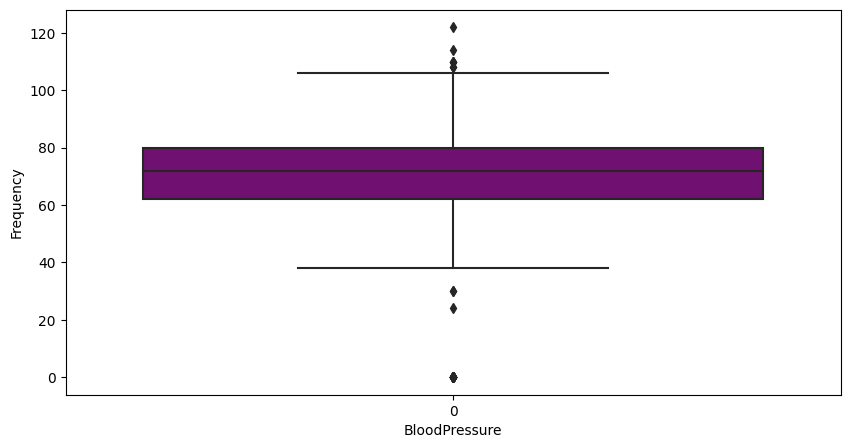

In [25]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.BloodPressure,color='purple')
plt.xlabel('BloodPressure')
plt.ylabel("Frequency")
plt.show()

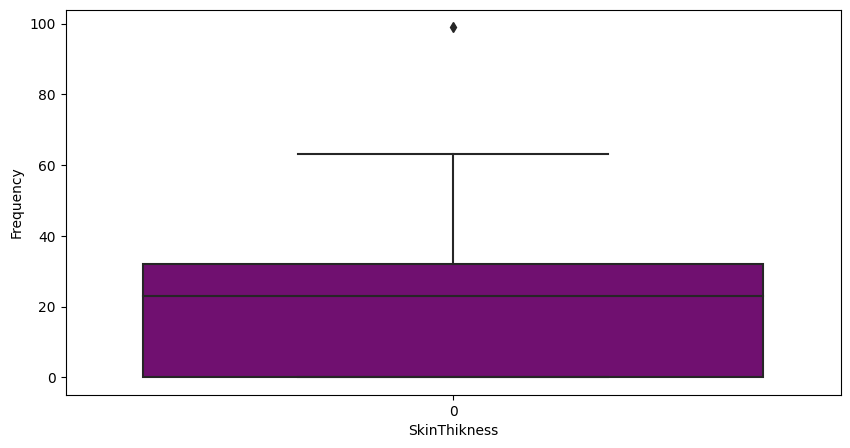

In [26]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.SkinThickness,color='purple')
plt.xlabel('SkinThikness')
plt.ylabel("Frequency")
plt.show()

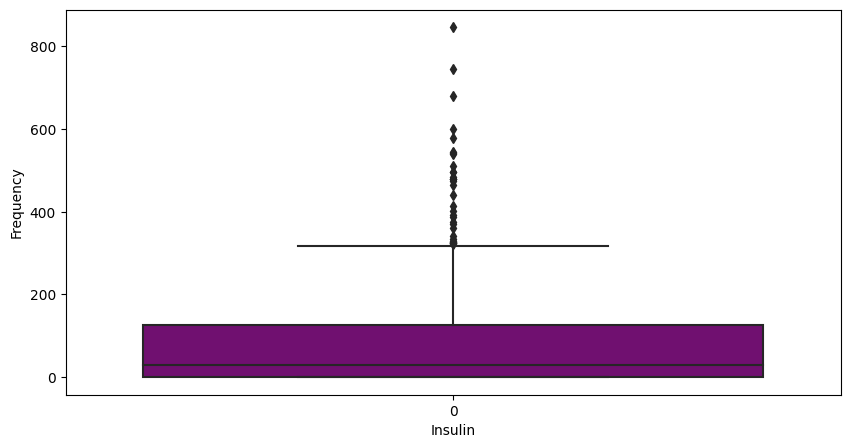

In [27]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.Insulin,color='purple')
plt.xlabel('Insulin')
plt.ylabel("Frequency")
plt.show()

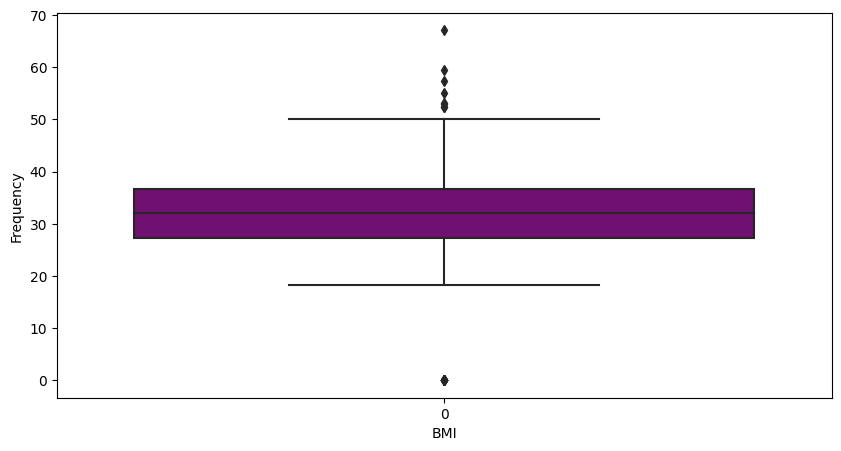

In [28]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.BMI,color='purple')
plt.xlabel('BMI')
plt.ylabel("Frequency")
plt.show()

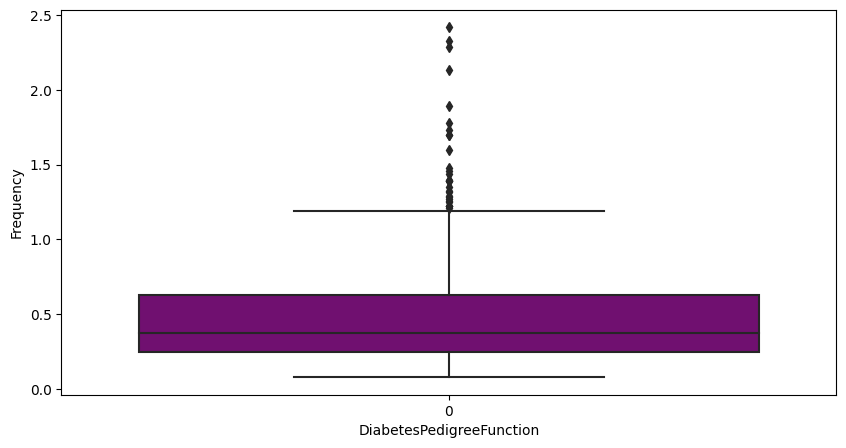

In [29]:
#Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.DiabetesPedigreeFunction,color='purple')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel("Frequency")
plt.show()

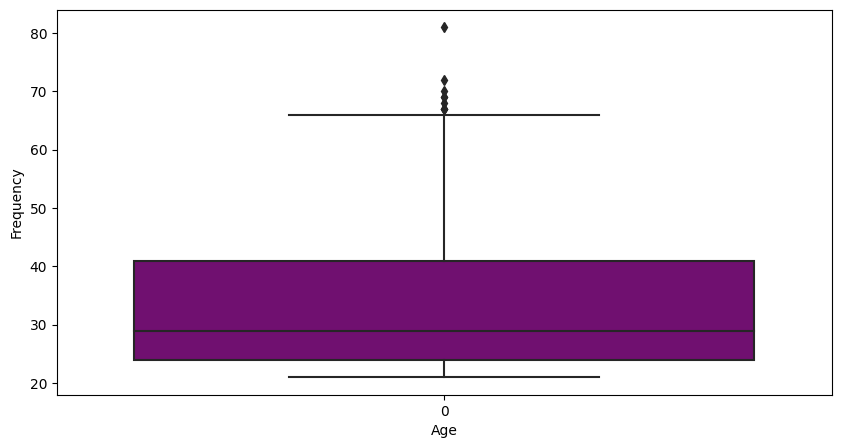

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.Age,color='purple')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

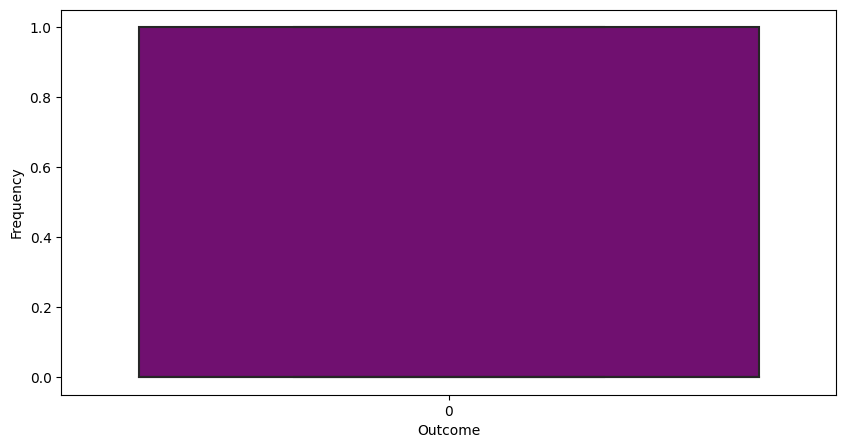

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(diabetics_data.Outcome,color='purple')
plt.xlabel('Outcome')
plt.ylabel("Frequency")
plt.show()

In [32]:
#Checking value count of outcome and balancing
diabetics_data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

The dataframe is highly imbalanced and we are going to employee undersampling method.

In [33]:
#Selecting variables based on outcome of 1 & 0
diabetics_data1=diabetics_data[diabetics_data.Outcome==1]
diabetics_data2=diabetics_data[diabetics_data.Outcome==0]

In [34]:
#printing the first five rows
diabetics_data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [35]:
#Checking value count of outcome and balancing
diabetics_data1.Outcome.value_counts()

Outcome
1    268
Name: count, dtype: int64

In [36]:
#printing the first five rows
diabetics_data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [37]:
#Checking value count of outcome and balancing
diabetics_data2.Outcome.value_counts()

Outcome
0    500
Name: count, dtype: int64

In [38]:
#Deploying undersampling method
diabetics_data3=diabetics_data2.sample(n=268)

In [39]:
#Checking value count of outcome and balancing
diabetics_data3.Outcome.value_counts()

Outcome
0    268
Name: count, dtype: int64

In [41]:
diabetics_data=pd.concat([diabetics_data1,diabetics_data3],axis=0)

In [42]:
diabetics_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
527,3,116,74,15,105,26.3,0.107,24,0
687,1,107,50,19,0,28.3,0.181,29,0
756,7,137,90,41,0,32.0,0.391,39,0
101,1,151,60,0,0,26.1,0.179,22,0


In [43]:
#Checking value count of outcome and balancing
diabetics_data.Outcome.value_counts()

Outcome
1    268
0    268
Name: count, dtype: int64

Modelling

Importing the libraries for modelling

Variable selection

In [46]:
#Variable selection through dropping
X=diabetics_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y=diabetics_data['Outcome']

In [47]:
#print the first five rows
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53


In [48]:
#print the first five rows
Y.head()

0    1
2    1
4    1
6    1
8    1
Name: Outcome, dtype: int64

In [49]:
#Splitting the data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [50]:
#Printing rows and columns
diabetics_data.shape,X_train.shape,X_test.shape

((536, 9), (428, 8), (108, 8))

# Training the model with Logistic regression

In [51]:
#Logistic regression
model=LogisticRegression()

In [52]:
#Fitting the model
model.fit(X_train,Y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

Model evaluation

In [54]:
#Train evaluation
accuracy_score(Y_train,y_pred_train)

0.7523364485981309

In [55]:
#test evaluation
accuracy_score(Y_test,y_pred_test)

0.7592592592592593

Plotting the scatterplot to check if the data has overfitted

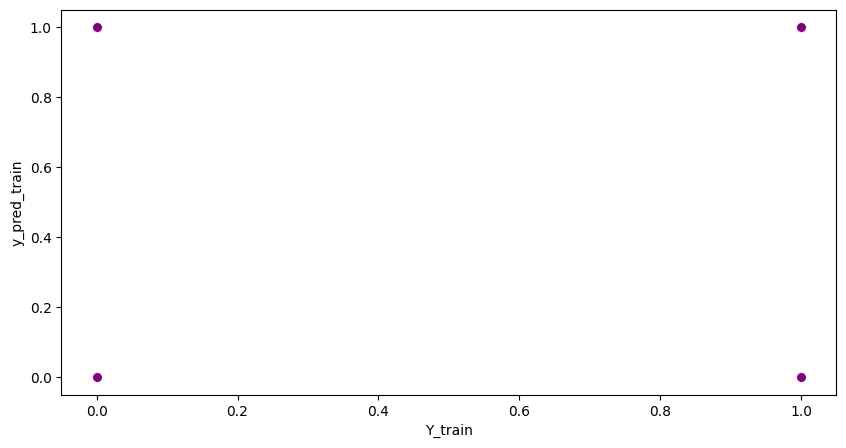

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_train,y=y_pred_train,s=50,color='purple')
plt.xlabel('Y_train')
plt.ylabel("y_pred_train")
plt.show()

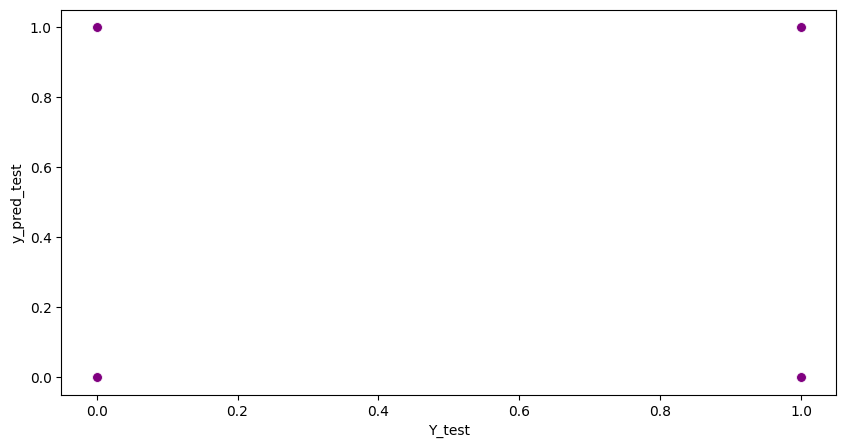

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_test,y=y_pred_test,s=50,color='purple')
plt.xlabel('Y_test')
plt.ylabel("y_pred_test")
plt.show()

# Training the model with DecisiontreeClassifier

In [58]:
#Decisiontreeclassifier regression
model=DecisionTreeClassifier()

In [59]:
#Fitting the model
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [61]:
#Train evaluation
accuracy_score(Y_train,y_pred_train)

1.0

In [62]:
#test evaluation
accuracy_score(Y_test,y_pred_test)

0.6481481481481481

Plotting the scatterplot to check if the data has overfitted

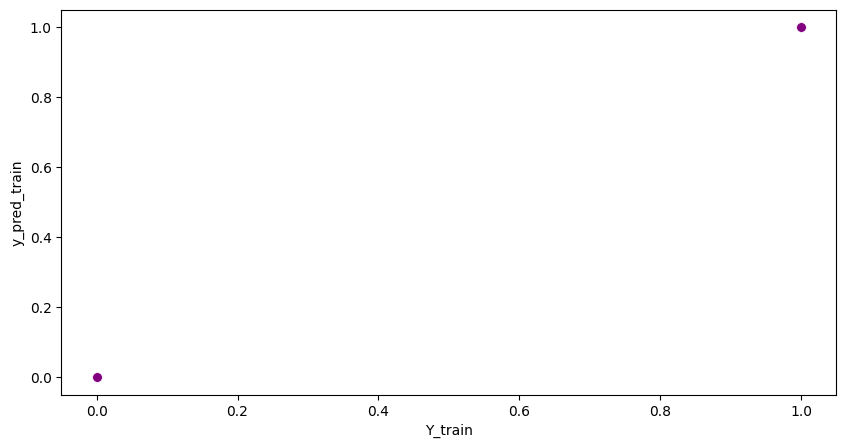

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_train,y=y_pred_train,s=50,color='purple')
plt.xlabel('Y_train')
plt.ylabel("y_pred_train")
plt.show()

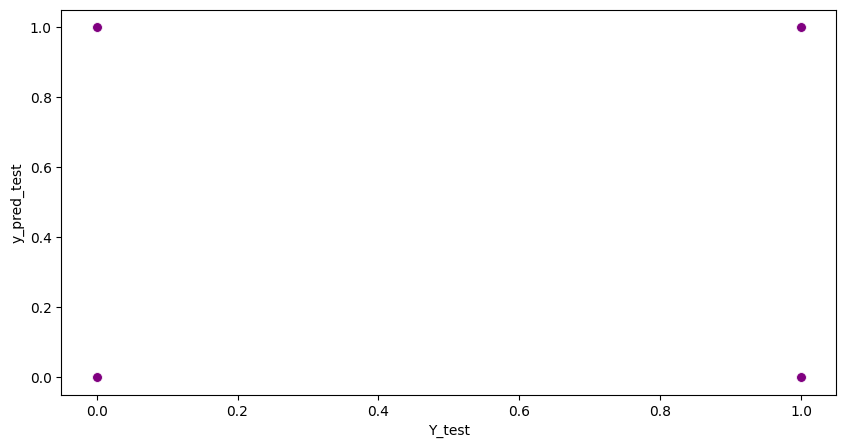

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_test,y=y_pred_test,s=50,color='purple')
plt.xlabel('Y_test')
plt.ylabel("y_pred_test")
plt.show()

# Training the model with RandomForestClassifier

In [65]:
#Decisiontreeclassifier regression
model=RandomForestClassifier()

In [66]:
#Fitting the model
model.fit(X_train,Y_train)

RandomForestClassifier()

In [67]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [68]:
#Train evaluation
accuracy_score(Y_train,y_pred_train)

1.0

In [69]:
#test evaluation
accuracy_score(Y_test,y_pred_test)

0.7962962962962963

Plotting the scatterplot to check if the data has overfitted

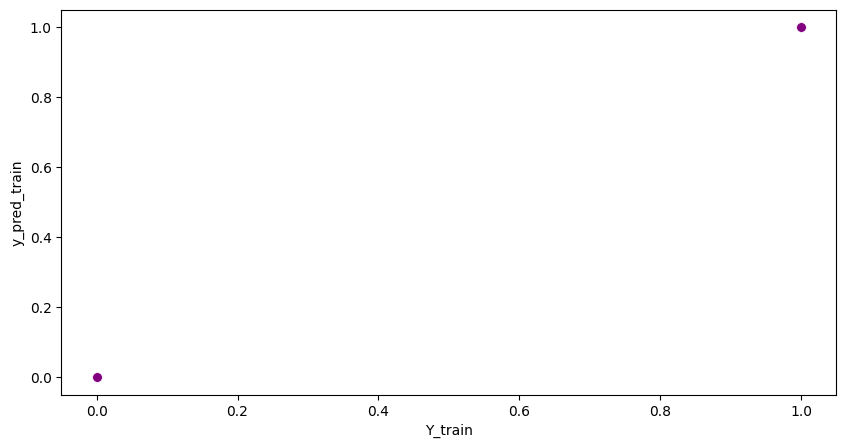

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_train,y=y_pred_train,s=50,color='purple')
plt.xlabel('Y_train')
plt.ylabel("y_pred_train")
plt.show()

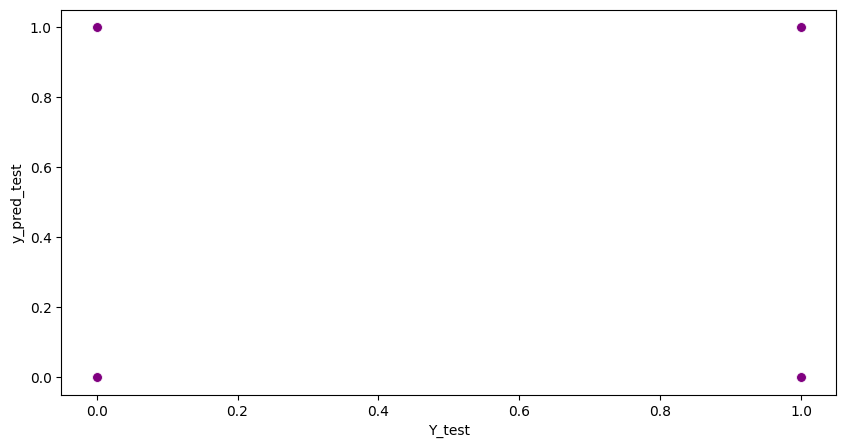

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Y_test,y=y_pred_test,s=50,color='purple')
plt.xlabel('Y_test')
plt.ylabel("y_pred_test")
plt.show()

After modelling and evaluation by utilizing the Logistic Regression,decision tree and random forest algorithm,it was established accuracy on train & test was (0.7523,0.759259),(1.0,0.6481),(1.0,0.7962) respectively.

The best algorithm to be used in DIABETIES DETECTION AND PREDICTION on the dataset is Logistic regression because of 75% on both train and test where new data will generalize well due to exclusion of overfitting

In [72]:
#Logistic regression
model_logistic=LogisticRegression()

In [73]:
#Fitting the model
model_logistic.fit(X_train,Y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#Predicting train and test
y_pred_train=model_logistic.predict(X_train)
y_pred_test=model_logistic.predict(X_test)

In [78]:
#Train evaluation
accuracy_score(Y_train,y_pred_train)

0.7523364485981309

In [79]:
#test evaluation
accuracy_score(Y_test,y_pred_test)

0.7592592592592593

In [80]:
#Importing joblib
import joblib

In [82]:
#Saving the model to local path with joblid.dump function
joblib.dump(model_logistic,"C:\\Users\\user\\DIABETICSPREDICTION\\model_logistics.sav")

['C:\\Users\\user\\DIABETICSPREDICTION\\model_logistics.sav']